In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('M:\Car_Dheko\cleaned_data.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
0,Third Party insurance,Petrol,998 cc,2015.0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,15.0,White,3.0,MPFi,No,3715.0,1635.0,1565.0,2425.0,5 Speed,FWD,5.0,Power,"tubeless,radial",5.0,235.0,23.1,DOHC,No,4.7,Bangalore,4.00,11.563955,4.00
1,Comprehensive,Petrol,1497 cc,2018.0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,16.0,White,3.0,Direct Injection,No,3998.0,1765.0,1647.0,2519.0,5 Speed,FWD,5.0,Power,"tubeless,radial",4.0,352.0,17.0,DOHC,No,5.3,Bangalore,8.11,10.395344,8.11


In [46]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.shape, test_df.shape


((6687, 34), (1672, 34))

In [47]:
df = train_df

In [73]:
test_df.to_csv('cleaned_test_data.csv', index=False)

In [4]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Year of Manufacture', 'ownerNo', 'Wheel Size', 'No of Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Seating Capacity',
       'No Door Numbers', 'Cargo Volumn', 'Mileage', 'Turning Radius',
       'price_in_lakhs', 'km_winsorized', 'price_in_lakhs_winzorized'],
      dtype='object')

In [75]:
df['Turning Radius'].value_counts()

Turning Radius
5.300000     760
4.800000     653
5.200000     560
4.900000     559
4.600000     475
            ... 
15.479145      1
11.478157      1
10.714427      1
5.337538       1
5.503206       1
Name: count, Length: 193, dtype: int64

## Feature Selection
### Numerical Features

In [6]:
actual_numerical_cols = ['Wheel Size','Length','Width','Height','Wheel Base',
                         'Cargo Volumn','Mileage','Turning Radius','km_winsorized','price_in_lakhs_winzorized']

In [5]:
actual_categorical_cols = ['Year of Manufacture','ownerNo','No of Cylinder','Seating Capacity',
                           'No Door Numbers','Fuel Type','bt','transmission',
                           'oem','Turbo Charger','Drive Type',
                           'Steering Type','Tyre Type','Value Configuration','Super Charger','City'
                           ]

In [7]:
pos_cols = []
neg_cols = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['price_in_lakhs_winzorized'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['price_in_lakhs_winzorized']) > 0.2
    negative_corr = df[col].corr(df['price_in_lakhs_winzorized']) < -0.2
    if positive_corr:
        pos_cols.append(col)
    elif negative_corr:
        neg_cols.append(col)



Corr Wheel Size : 0.7251466071039373
Corr Length : 0.6659371012584484
Corr Width : 0.7068795969647995
Corr Height : 0.32922782769087655
Corr Wheel Base : 0.7005362536305764
Corr Cargo Volumn : 0.1031581157265816
Corr Mileage : -0.3692536744941868
Corr Turning Radius : 0.016167980547582634
Corr km_winsorized : -0.2866042215578139
Corr price_in_lakhs_winzorized : 1.0


In [8]:
pos_cols

['Wheel Size',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'price_in_lakhs_winzorized']

In [9]:
neg_cols

['Mileage', 'km_winsorized']

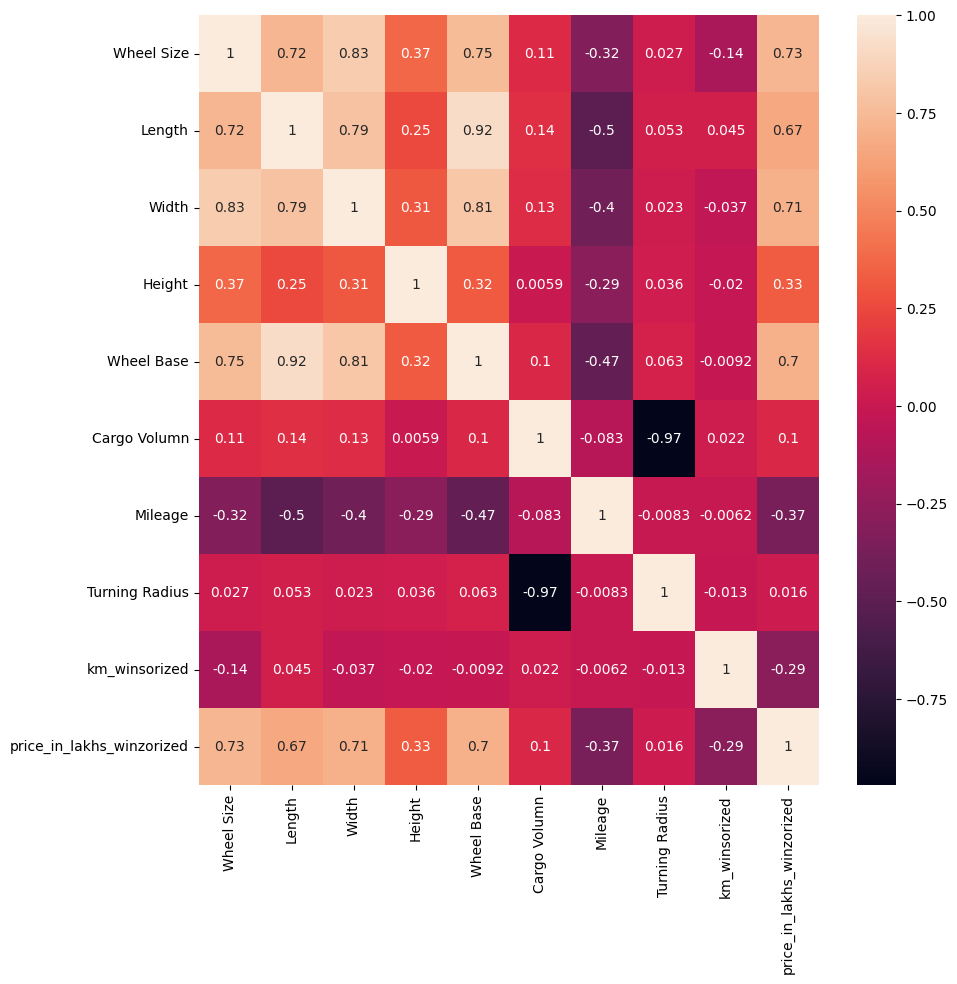

In [10]:
#Collinearity Checking
plt.figure(figsize=(10,10))
sns.heatmap(df[actual_numerical_cols].corr(),annot=True)
plt.show()


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features
features = df[['Wheel Size', 'Width']]  # Replace df with your actual DataFrame

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_data

,Feature,VIF
0,Wheel Size,437.515476
1,Width,437.515476


# 📌 Understanding Variance Inflation Factor (VIF)

## 🎯 What is VIF?
- VIF measures **how much a feature is correlated** with other features in a dataset.
- High VIF indicates **multicollinearity**, meaning the feature doesn't add much unique information.

## 🏆 VIF Interpretation Guide

| **VIF Value**  | **Interpretation**  | **Action**  |
|--------------|----------------|----------------|
| **VIF < 5**   | Low multicollinearity | ✅ Keep the feature  |
| **VIF 5 - 10** | Moderate multicollinearity | ⚠️ Consider removing if performance improves |
| **VIF > 10**   | High multicollinearity | ❌ Drop or combine with another feature |

---


In [48]:
columns_to_drop = ['Cargo Volumn','Wheel Base']

df = df.drop(columns=columns_to_drop, axis=1)

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Insurance Validity', 'Fuel Type', 'Engine Displacement', 'ft', 'bt',
       'transmission', 'oem', 'model', 'Color', 'Fuel Suppy System',
       'Turbo Charger', 'Gear Box', 'Drive Type', 'Steering Type', 'Tyre Type',
       'Value Configuration', 'Super Charger', 'City'],
      dtype='object')

In [85]:
df.shape

(6687, 32)

### Categorical Features

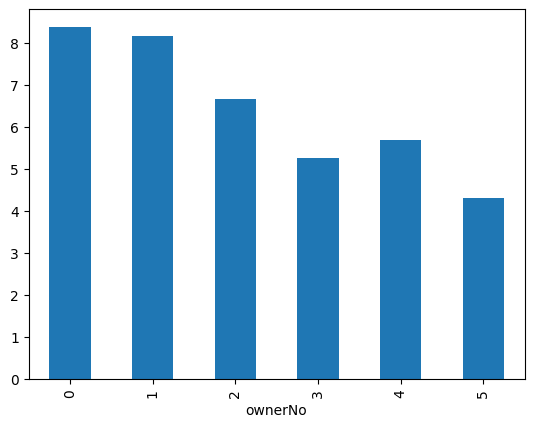

In [86]:
df.groupby(['ownerNo'])['price_in_lakhs_winzorized'].mean().plot.bar();


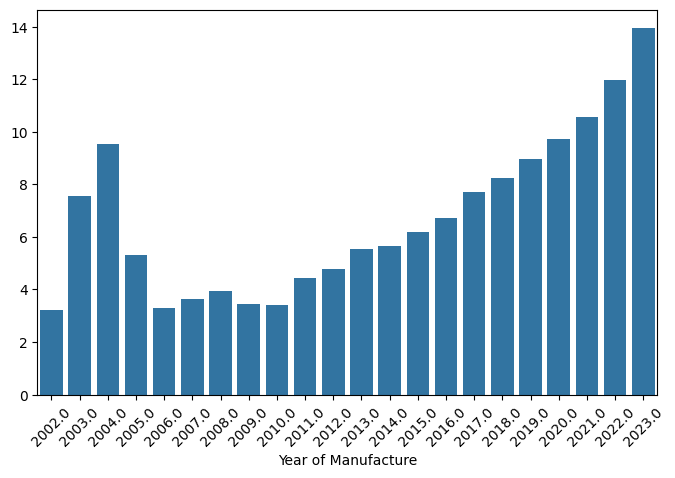

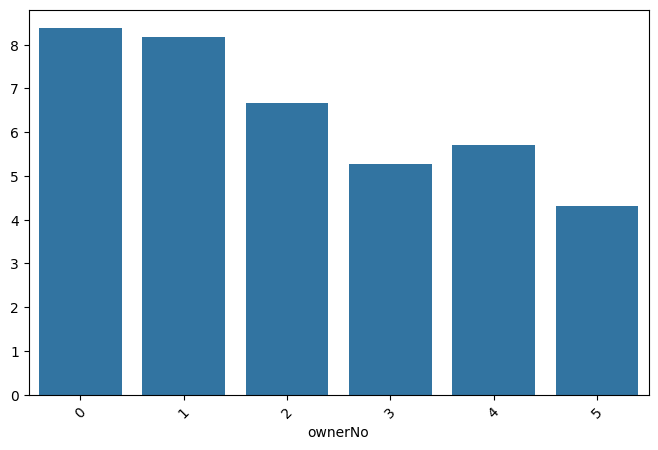

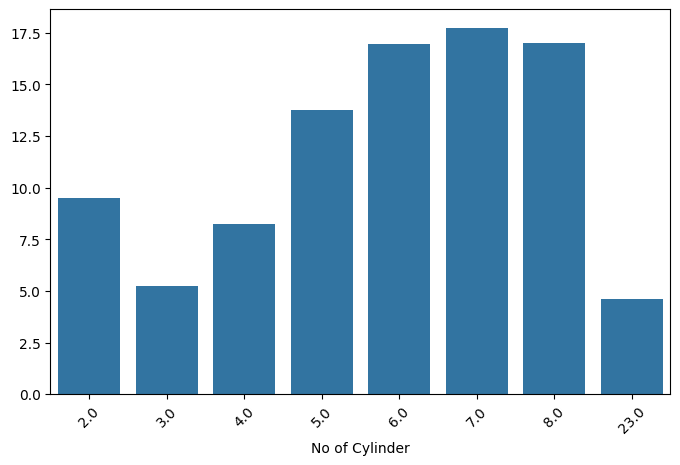

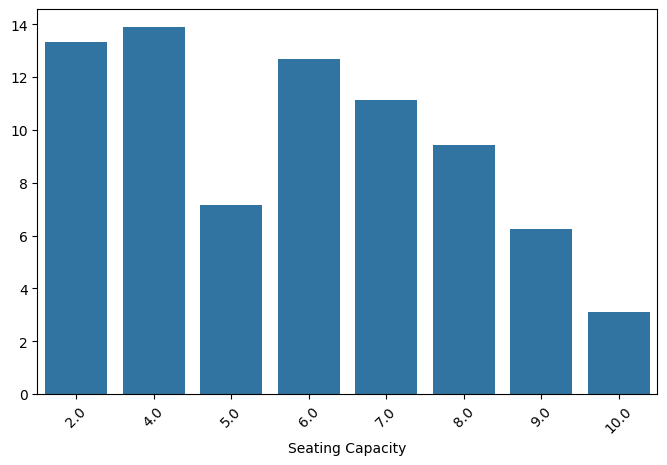

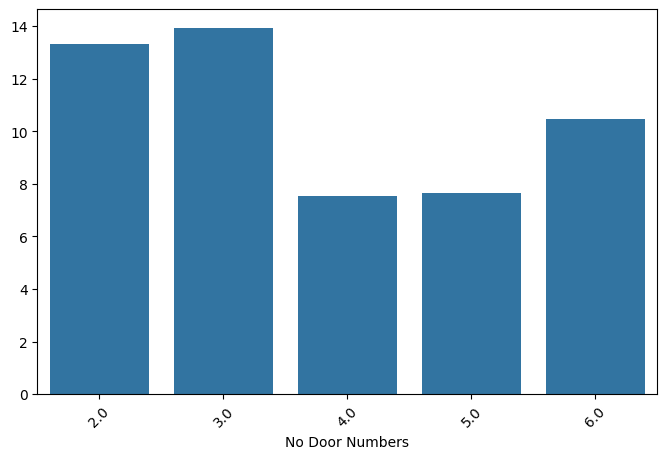

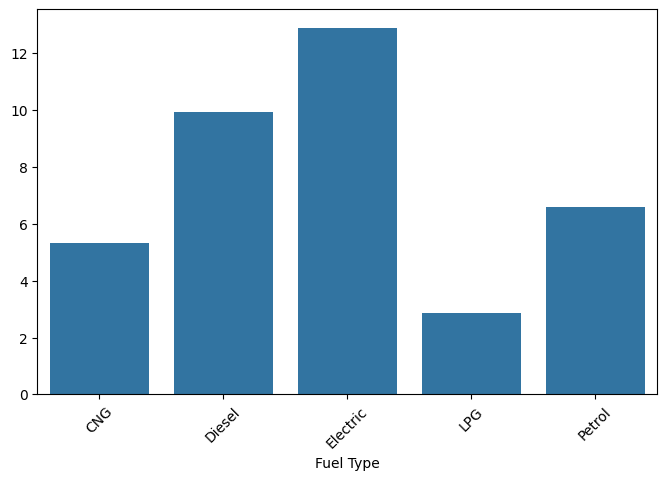

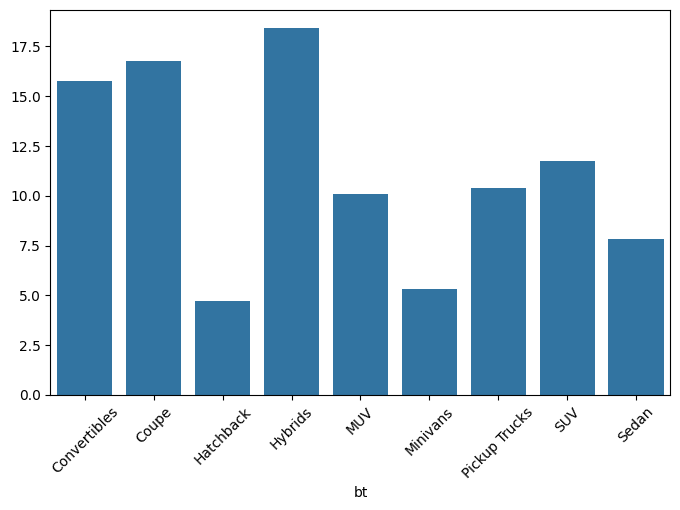

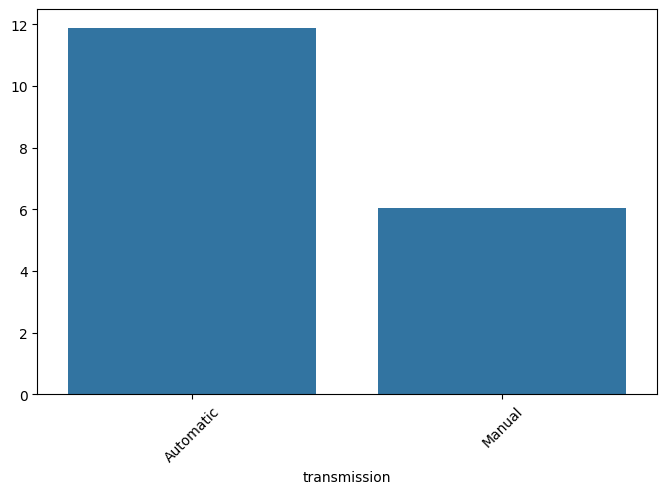

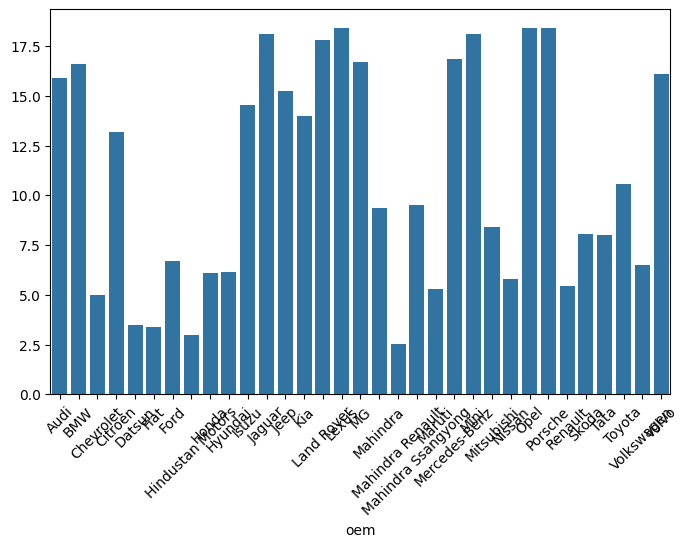

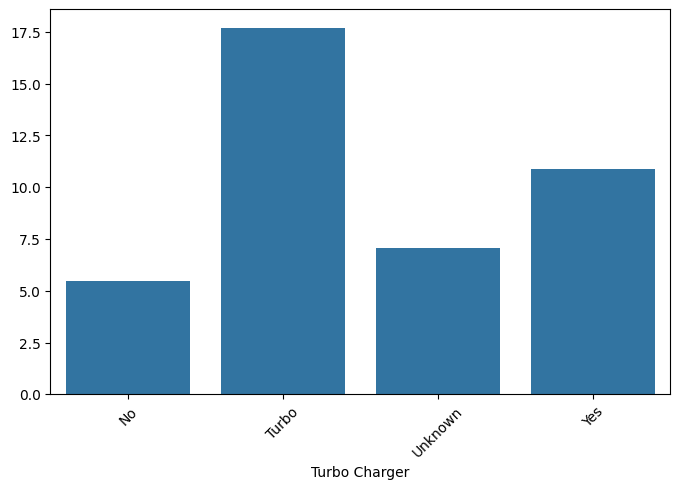

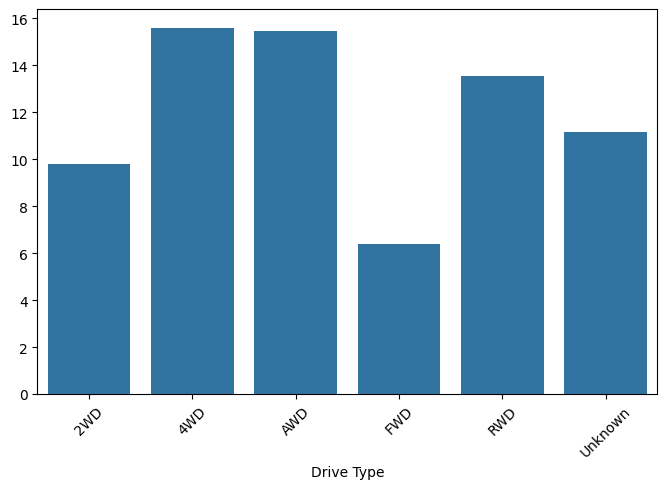

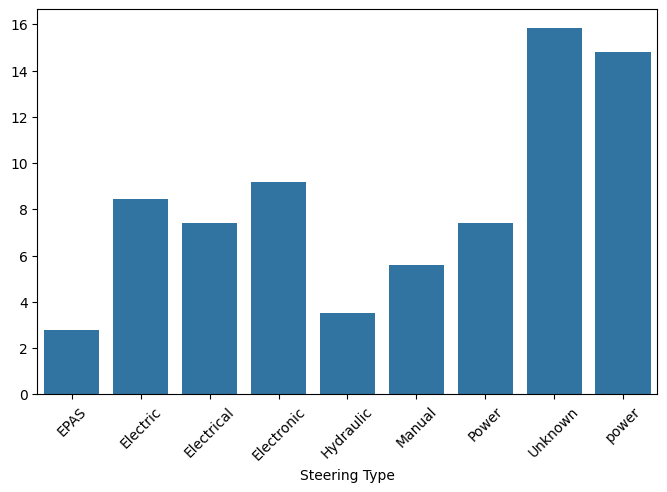

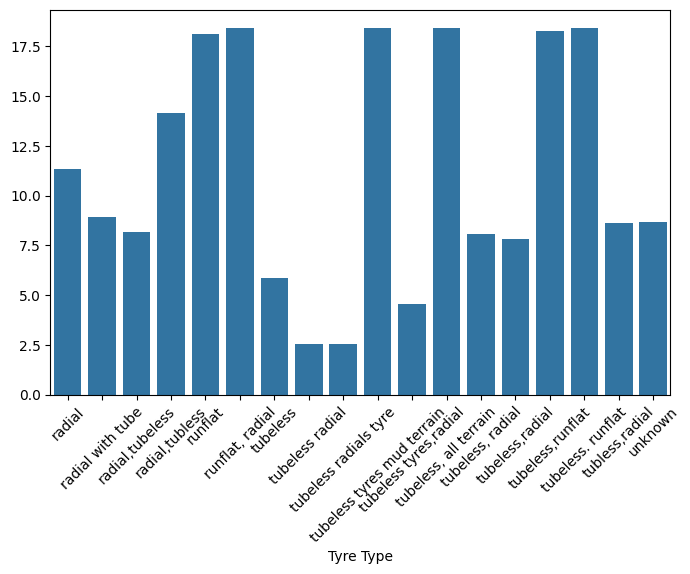

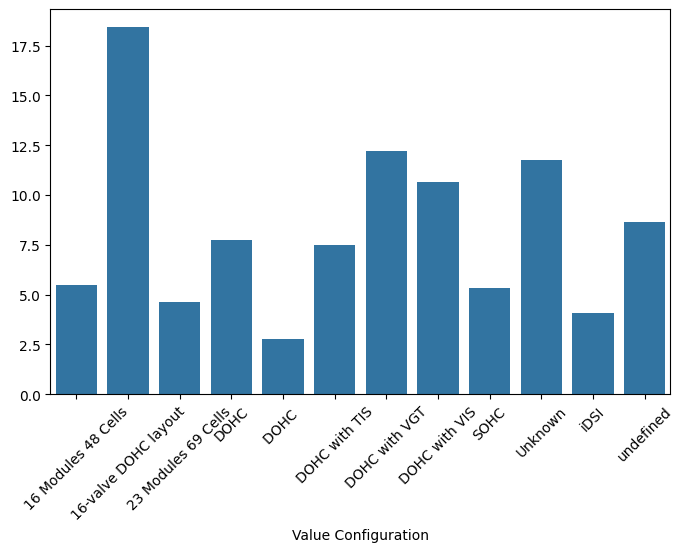

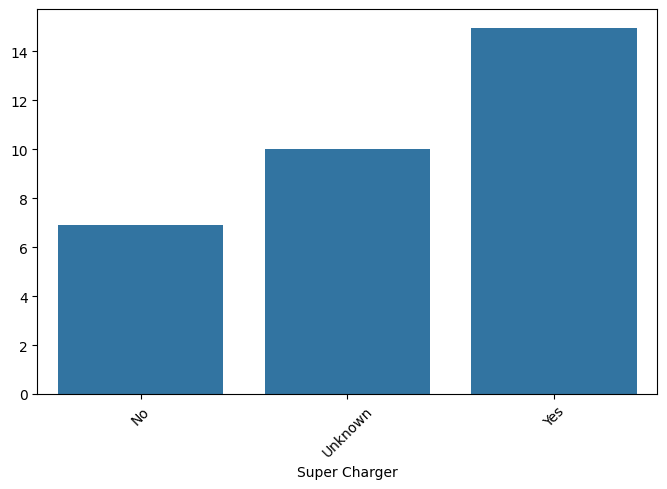

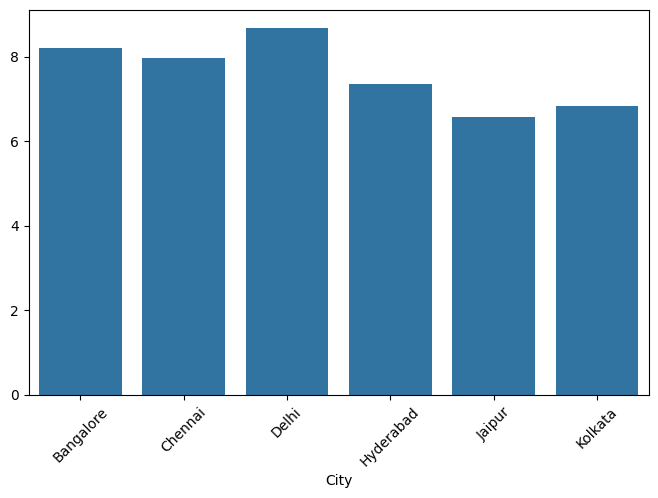

In [87]:
for col in actual_categorical_cols:
    grouped_df = df.groupby([col])['price_in_lakhs_winzorized'].mean()
    plt.figure(figsize=(8,5))
    sns.barplot(x=grouped_df.index,y=grouped_df.values)
    plt.xticks(rotation=45)
    plt.show()

In [49]:
selected_cat_cols = ['Year of Manufacture','ownerNo','No of Cylinder',
                     'Seating Capacity','No Door Numbers','Fuel Type','bt','transmission',
                     'oem','Turbo Charger','Drive Type','Steering Type','Tyre Type',
                     'Value Configuration','Super Charger']

In [89]:
df['Steering Type'].value_counts()

Steering Type
Power         5293
Electric      1139
Electronic      82
Manual          69
Electrical      43
Unknown         29
power           24
EPAS             6
Hydraulic        2
Name: count, dtype: int64

In [50]:
def clean_steering(x):
    if x =='Electrical':
        return 'Electric'
    elif x == 'power':
        return 'Power'
    else:
        return x
df['Steering Type'] = df['Steering Type'].apply(clean_steering)
df['Steering Type'].value_counts()

Steering Type
Power         5317
Electric      1182
Electronic      82
Manual          69
Unknown         29
EPAS             6
Hydraulic        2
Name: count, dtype: int64

In [51]:
tyre_dict = {
    'tubeless,radial': 'Tubeless + Radial',
    'radial,tubeless': 'Tubeless + Radial',
    'tubeless, radial': 'Tubeless + Radial',
    'tubeless tyres,radial': 'Tubeless + Radial',
    'tubeless radials tyre': 'Tubeless + Radial',
    'tubeless radial': 'Tubeless + Radial',
    'radial,tubless': 'Tubeless + Radial',
    'tubeless. runflat': 'Tubeless + Runflat',
    'tubeless,runflat': 'Tubeless + Runflat',
    'tubeless radials tyre': 'Tubeless + Runflat',
    'runflat, radial': 'Runflat + Radial',
    'runflat': 'Runflat',
    'radial': 'Radial',
    'tubeless': 'Tubeless',
    'unknown': 'Unknown',
    'radial with tube': 'Radial with Tube',
    'tubeless, all terrain': 'Tubeless + All Terrain',
    'tubeless tyres mud terrain': 'Tubeless + Mud Terrain'
}

def clean_tyre(x):
    x = x.lower().strip()
    return tyre_dict.get(x,'Other')

df['Tyre Type'] = df['Tyre Type'].apply(clean_tyre)


In [52]:
df['Tyre Type'].value_counts()

Tyre Type
Tubeless + Radial         5112
Tubeless                  1303
Radial                     120
Unknown                     57
Tubeless + Runflat          35
Runflat                     29
Other                       24
Tubeless + Mud Terrain       3
Radial with Tube             2
Tubeless + All Terrain       1
Runflat + Radial             1
Name: count, dtype: int64

In [53]:
def clean_turbo_charger(x):
    if x == 'Turbo':
        return 'Yes'
    return x

df['Turbo Charger'] = df['Turbo Charger'].apply(clean_turbo_charger)

df['Turbo Charger'].value_counts()

Turbo Charger
No         3434
Yes        2445
Unknown     808
Name: count, dtype: int64

## 📌 When to Use Different Encoding Methods?

| Encoding Method       | When to Use? |
|----------------------|--------------|
| **One-Hot Encoding**  | ✅ Use for **nominal (unordered) categories** with **few unique values**.<br>🔹 Examples: Colors (`Red, Blue, Green`), Countries (`USA, India, UK`). |
| **Ordinal Encoding**  | ✅ Use for **ordered categories** where ranking matters.<br>🔹 Examples: Education Level (`High School < Bachelor < Master < PhD`), Satisfaction Ratings (`Dissatisfied < Neutral < Satisfied`). |
| **Label Encoding**    | ✅ Only use when working with models that don’t assume numerical relationships, like **Decision Trees**.<br>🚫 Not recommended for **ordered categories**. |
| **Target Encoding**   | ✅ Best for **high-cardinality categorical features** (i.e., many unique values).<br>🔹 Example: Cities (`New York, London, Paris`) when there are 1000+ categories. |

### ❌ When to Avoid One-Hot Encoding?
- 🚫 **For ordered categories** → Use **Ordinal Encoding** instead.
- 🚫 **For high-cardinality features** → Too many one-hot columns can make models inefficient. Use **Target Encoding** instead.

---


In [54]:
ordered_cols = ['bt','Gear Box','transmission','ownerNo','Wheel Size','No of Cylinder','Seating Capacity','No Door Numbers','Year of Manufacture']

In [55]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df[ordered_cols] = oe.fit_transform(df[ordered_cols])

df.head(2)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
798,Third Party insurance,Petrol,1197 cc,18.0,Petrol,2.0,1.0,1.0,Maruti,Maruti Baleno,4.0,Others,2.0,MPFI,No,3995.0,1745.0,1510.0,7.0,FWD,2.0,Electric,Tubeless + Radial,3.0,21.01,DOHC,No,4.900000,Bangalore,9.0,9.702973,9.00
88,Comprehensive,Diesel,1995 cc,14.0,Diesel,7.0,0.0,2.0,BMW,BMW X3,7.0,White,2.0,Unknown,Yes,4708.0,2138.0,1676.0,64.0,4WD,2.0,Electric,Tubeless + Radial,3.0,16.55,DOHC,Unknown,7.414292,Bangalore,28.9,11.429555,18.41


In [56]:
df.drop(columns=['Engine Displacement','ft','model','Color','Fuel Suppy System','price_in_lakhs','City'],inplace=True)

In [57]:
nominal_cols_with_less_categories = ['Insurance Validity','Turbo Charger','Drive Type','Fuel Type','Steering Type','Drive Type']
nominal_cols_with_more_categories = ['Tyre Type','Value Configuration','oem']

In [58]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['oem'] = encoder.fit_transform(df['oem'], df['price_in_lakhs_winzorized'])


In [60]:
df['Value Configuration'] = encoder.fit_transform(df['Value Configuration'], df['price_in_lakhs_winzorized'])
df['Tyre Type'] = encoder.fit_transform(df['Tyre Type'], df['price_in_lakhs_winzorized'])

In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_array = ohe.fit_transform(df[nominal_cols_with_less_categories]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(nominal_cols_with_less_categories))

df = pd.concat([df, encoded_df], axis=1)

df.head(2)

,Insurance Validity,Fuel Type,Year of Manufacture,bt,transmission,ownerNo,oem,Wheel Size,No of Cylinder,Turbo Charger,Length,Width,Height,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Mileage,Value Configuration,Super Charger,Turning Radius,km_winsorized,price_in_lakhs_winzorized,Insurance Validity_Comprehensive,Insurance Validity_Not Available,Insurance Validity_Third Party insurance,Insurance Validity_Unknown,Insurance Validity_Zero Dep,Turbo Charger_No,Turbo Charger_Unknown,Turbo Charger_Yes,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Steering Type_EPAS,Steering Type_Electric,Steering Type_Electronic,Steering Type_Hydraulic,Steering Type_Manual,Steering Type_Power,Steering Type_Unknown,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown
798,Third Party insurance,Petrol,18.0,2.0,1.0,1.0,5.279246,4.0,2.0,No,3995.0,1745.0,1510.0,7.0,FWD,2.0,Electric,7.867784,3.0,21.01,7.747522,No,4.900000,9.702973,9.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88,Comprehensive,Diesel,14.0,7.0,0.0,2.0,16.597277,7.0,2.0,Yes,4708.0,2138.0,1676.0,64.0,4WD,2.0,Electric,7.867784,3.0,16.55,7.747522,Unknown,7.414292,11.429555,18.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
df.drop(columns=nominal_cols_with_less_categories,inplace=True)

In [64]:
df.drop(columns=nominal_cols_with_more_categories,inplace=True)

In [65]:
df.sample(3)

,Year of Manufacture,bt,transmission,ownerNo,Wheel Size,No of Cylinder,Length,Width,Height,Gear Box,Seating Capacity,No Door Numbers,Mileage,Super Charger,Turning Radius,km_winsorized,price_in_lakhs_winzorized,Insurance Validity_Comprehensive,Insurance Validity_Not Available,Insurance Validity_Third Party insurance,Insurance Validity_Unknown,Insurance Validity_Zero Dep,Turbo Charger_No,Turbo Charger_Unknown,Turbo Charger_Yes,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Steering Type_EPAS,Steering Type_Electric,Steering Type_Electronic,Steering Type_Hydraulic,Steering Type_Manual,Steering Type_Power,Steering Type_Unknown,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown
5211,11.0,7.0,1.0,2.0,5.0,2.0,4585.0,1890.0,1785.0,21.0,4.0,3.0,15.1,No,5.600000,11.563955,6.80,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3524,16.0,8.0,0.0,2.0,5.0,2.0,4795.0,2075.0,1416.0,64.0,2.0,2.0,13.5,No,5.734789,10.434145,18.41,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4062,13.0,8.0,1.0,1.0,3.0,2.0,3990.0,1680.0,1505.0,7.0,2.0,2.0,18.0,No,4.500000,10.819798,3.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
df.shape

(8015, 49)

# **Comparison of Scaling Methods in Machine Learning**

## **1. StandardScaler (Z-score Normalization)**
- **Formula:** \( X' = \frac{X - \mu}{\sigma} \)
- **Effect:** Centers data around 0 with a standard deviation of 1.
- **Best for:** Algorithms assuming normally distributed data (e.g., Linear Regression, Logistic Regression, SVM, PCA).
- **Limitations:** Affected by outliers.

## **2. MinMaxScaler (Min-Max Normalization)**
- **Formula:** \( X' = \frac{X - X_{min}}{X_{max} - X_{min}} \)
- **Effect:** Scales values to a fixed range [0, 1].
- **Best for:** Algorithms that do not assume normal distribution (e.g., Neural Networks, K-Means).
- **Limitations:** Sensitive to outliers.

## **3. RobustScaler (Scaling Using Median & IQR)**
- **Formula:** \( X' = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
- **Effect:** Scales using median and interquartile range, making it robust to outliers.
- **Best for:** Datasets with outliers.

## **4. MaxAbsScaler (Max Absolute Scaling)**
- **Formula:** \( X' = \frac{X}{|X_{max}|} \)
- **Effect:** Scales data to [-1, 1] without shifting mean.
- **Best for:** Sparse data or cases where zero-centered data isn't required.

## **5. PowerTransformer (Box-Cox & Yeo-Johnson)**
- **Effect:** Makes data more Gaussian-like.
- **Best for:** Highly skewed data distributions.

## **6. QuantileTransformer**
- **Effect:** Transforms data to follow a uniform or normal distribution.
- **Best for:** Non-Gaussian data to improve performance in linear models.

## **Which One Should You Use?**
| **Scaling Method**    | **Best For**                             | **Handles Outliers?** |
|----------------------|---------------------------------------|----------------------|
| StandardScaler      | Normal distribution data (SVM, PCA)  | ❌ No               |
| MinMaxScaler       | Data with fixed range (Neural Nets)  | ❌ No               |
| RobustScaler       | Data with outliers                    | ✅ Yes              |
| MaxAbsScaler       | Sparse data                           | ❌ No               |
| PowerTransformer   | Skewed data                           | ✅ Yes              |
| QuantileTransformer | Non-Gaussian data                    | ✅ Yes              |

**🔹 Key Takeaways:**
- Use **StandardScaler** if the data follows a normal distribution.
- Use **MinMaxScaler** if the data needs to be between 0 and 1.
- Use **RobustScaler** if the data contains many outliers.
- Use **PowerTransformer** if the data is skewed.


In [69]:
df.drop('Super Charger',axis=1,inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

df = pd.DataFrame(scaled_data, columns=df.columns)

df.head(2)

,Year of Manufacture,bt,transmission,ownerNo,Wheel Size,No of Cylinder,Length,Width,Height,Gear Box,Seating Capacity,No Door Numbers,Mileage,Turning Radius,km_winsorized,price_in_lakhs_winzorized,Insurance Validity_Comprehensive,Insurance Validity_Not Available,Insurance Validity_Third Party insurance,Insurance Validity_Unknown,Insurance Validity_Zero Dep,Turbo Charger_No,Turbo Charger_Unknown,Turbo Charger_Yes,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Steering Type_EPAS,Steering Type_Electric,Steering Type_Electronic,Steering Type_Hydraulic,Steering Type_Manual,Steering Type_Power,Steering Type_Unknown,Drive Type_2WD,Drive Type_4WD,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,Drive Type_Unknown
0,0.905352,-1.099003,0.617747,-0.563292,0.330206,0.373759,-0.275551,0.110281,-0.570083,-0.55061,-0.311089,0.643096,0.444567,-0.019640,-1.810707,0.273319,1.301197,-0.16821,-1.138924,-0.034609,-0.191268,0.973289,-0.370727,-0.759196,5.116926,-0.154043,-0.194189,-2.058274,-0.249205,-0.193774,-0.102853,-0.682970,-0.056128,-0.048974,0.708297,-0.029968,-0.463372,-0.111422,-0.017297,-0.102108,0.507606,-0.065997,5.116926,-0.154043,-0.194189,-2.058274,-0.249205,-0.193774
1,-0.141796,0.751300,-1.618785,0.988720,2.548647,0.373759,1.519091,3.185728,0.967039,2.18239,-0.311089,0.643096,-0.666075,0.013277,1.082932,2.178686,1.301197,-0.16821,-1.138924,-0.034609,-0.191268,-1.027444,-0.370727,1.317182,-0.195430,-0.154043,-0.194189,0.485844,-0.249205,-0.193774,-0.102853,1.464194,-0.056128,-0.048974,-1.411838,-0.029968,-0.463372,-0.111422,-0.017297,-0.102108,0.507606,-0.065997,-0.195430,-0.154043,-0.194189,0.485844,-0.249205,-0.193774


In [71]:
df.to_csv('scaled_data',index=False)

In [27]:
df.columns

Index(['Year of Manufacture', 'bt', 'transmission', 'ownerNo', 'oem',
       'Wheel Size', 'No of Cylinder', 'Length', 'Width', 'Height', 'Gear Box',
       'Seating Capacity', 'Tyre Type', 'No Door Numbers', 'Mileage',
       'Value Configuration', 'Super Charger', 'Turning Radius',
       'km_winsorized', 'price_in_lakhs_winzorized',
       'Insurance Validity_Comprehensive', 'Insurance Validity_Not Available',
       'Insurance Validity_Third Party insurance',
       'Insurance Validity_Unknown', 'Insurance Validity_Zero Dep',
       'Turbo Charger_No', 'Turbo Charger_Unknown', 'Turbo Charger_Yes',
       'Drive Type_2WD', 'Drive Type_4WD', 'Drive Type_AWD', 'Drive Type_FWD',
       'Drive Type_RWD', 'Drive Type_Unknown', 'Fuel Type_CNG',
       'Fuel Type_Diesel', 'Fuel Type_Electric', 'Fuel Type_LPG',
       'Fuel Type_Petrol', 'Steering Type_EPAS', 'Steering Type_Electric',
       'Steering Type_Electronic', 'Steering Type_Hydraulic',
       'Steering Type_Manual', 'Steering Type

In [28]:
from sklearn.preprocessing import TargetEncoder
X = df[['oem']]
y = df['price_in_lakhs_winzorized']

encoder = TargetEncoder()

# Fit and transform the data
X_encoded = encoder.fit_transform(X, y)

X_encoded.head()

m:\Car_Dheko\.venv\Lib\site-packages\sklearn\utils\_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [101]:
test_df['price_in_lakhs_winzorized'].isnull().sum()


np.int64(0)

In [103]:
import category_encoders as ce

# Ensure categorical columns are strings & handle missing values
df[nominal_cols_with_more_categories] = df[nominal_cols_with_more_categories].astype(str).fillna("missing")

# Handle missing values in the target column (Choose ONE of these)
df['price_in_lakhs_winzorized'] = df['price_in_lakhs_winzorized'].fillna(df['price_in_lakhs_winzorized'].median())  # Option 1: Median Imputation
# df['price_in_lakhs_winzorized'] = df['price_in_lakhs_winzorized'].fillna(0)  # Option 2: Fill with 0 (if it makes sense)
# df = df.dropna(subset=['price_in_lakhs_winzorized'])  # Option 3: Drop rows with missing target values

# Initialize Target Encoder
encoder = ce.TargetEncoder(cols=nominal_cols_with_more_categories)

# Fit and transform categorical features
df_encoded = encoder.fit_transform(df[nominal_cols_with_more_categories], df['price_in_lakhs_winzorized'])

# Replace only categorical columns with encoded values
df[nominal_cols_with_more_categories] = df_encoded

# Final check for missing values
print(df.isnull().sum())






Year of Manufacture                         1328
bt                                          1328
transmission                                1328
ownerNo                                     1328
oem                                            0
Wheel Size                                  1328
No of Cylinder                              1328
Length                                      1328
Width                                       1328
Height                                      1328
Gear Box                                    1328
Seating Capacity                            1328
Tyre Type                                      0
No Door Numbers                             1328
Mileage                                     1328
Value Configuration                            0
Super Charger                               1328
Turning Radius                              1328
km_winsorized                               1328
price_in_lakhs_winzorized                      0
Insurance Validity_C

In [52]:
from sklearn.feature_selection import f_classif
# ANOVA F-test
anova_scores, anova_p_values = f_classif(df, df['price_in_lakhs_winzorized'])

print("ANOVA F-test Scores:", anova_scores)
print("ANOVA F-test P-values:", anova_p_values)

# Select features with p-value < 0.05
selected_features = df.columns[anova_p_values < 0.05]



ANOVA F-test Scores: [6.99393908e+00 3.94683340e+00 1.54433825e+00 1.17588251e+01
 2.38102394e+00 8.50433464e+00 9.81109755e+00 2.22160671e+00
 9.46083588e+00 6.32549846e+00 1.41295933e+00 1.04795632e+00
 3.19786921e-01 2.64819771e+00 1.92200511e-01 1.50917697e+00
 2.22018610e+00 9.16029666e+14 2.09107450e+00 7.95327229e-01
 1.98120261e+00 5.01770692e-01 3.74228288e+00 3.12801797e-01
 2.52077880e-01 8.41019354e-03 4.60444263e-01 6.18539886e-02
 1.25569718e-01 2.19083142e-01 5.92257024e-01 1.44175377e+00
 1.34636459e+00 8.41019354e-03 2.44171120e-01 8.41019354e-03
 4.11877662e-01 1.41145407e+00 2.52077880e-01 3.72561843e-01
 7.10203277e-02 1.44311668e-01 8.41019354e-03 1.69858170e-01
 1.14795082e+00 6.52687057e-01 3.72561843e-01 8.45497743e-03
 8.41019354e-03 8.45497743e-03 8.07647446e-02 8.70562224e-01
 2.23161729e-01 1.11956241e+00 1.17902557e-01 1.50968258e-01
 3.72561843e-01 7.84256756e+00 2.89561779e-01 6.71562283e-02
 3.55584557e-01 1.95993806e+00 5.17189282e-01 8.41019354e-03
 1.

m:\Car_Dheko\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [53]:
len(selected_features)

88

In [58]:
df2 = pd.read_csv('M:\Car_Dheko\cleaned_data.csv')

In [59]:
ordered_cols = ['bt','Gear Box','transmission','ownerNo','Wheel Size','No of Cylinder','Seating Capacity','No Door Numbers','Year of Manufacture']

In [60]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

df[ordered_cols] = oe.fit_transform(df[ordered_cols])

df.head(2)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,Wheel Size,Color,No of Cylinder,Fuel Suppy System,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
0,Third Party insurance,Petrol,998 cc,13.0,Petrol,2.0,1.0,3.0,Maruti,Maruti Celerio,3.0,White,1.0,MPFi,No,3715.0,1635.0,1565.0,2425.0,9.0,FWD,2.0,Power,"tubeless,radial",3.0,235.0,23.1,DOHC,No,4.7,Bangalore,4.00,11.563955,4.00
1,Comprehensive,Petrol,1497 cc,16.0,Petrol,7.0,1.0,2.0,Ford,Ford Ecosport,4.0,White,1.0,Direct Injection,No,3998.0,1765.0,1647.0,2519.0,8.0,FWD,2.0,Power,"tubeless,radial",2.0,352.0,17.0,DOHC,No,5.3,Bangalore,8.11,10.395344,8.11


In [73]:
columns_to_drop = ['Engine Displacement','ft','model','Fuel Suppy System','Value Configuration']

df = df.drop(columns=columns_to_drop, axis=1)

In [61]:
columns_to_target_encode = ['Insurance Validity','Fuel Type','transmission','oem',
                            'Color','Turbo Charger','Drive Type','Steering Type','Tyre Type','City','Super Charger']

In [74]:
df[columns_to_target_encode] = df_encoded

df.head(2)

,Insurance Validity,Fuel Type,Year of Manufacture,bt,transmission,ownerNo,oem,Wheel Size,Color,No of Cylinder,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized,Car Brand Encoded
0,7.174093,6.608185,13.0,2.0,6.016221,3.0,5.316430,3.0,9.241176,1.0,5.489418,3715.0,1635.0,1565.0,2425.0,9.0,6.374789,2.0,7.424785,7.807062,3.0,235.0,23.1,6.938653,4.7,8.273309,4.00,11.563955,4.00,0
1,8.562172,6.608185,16.0,7.0,6.016221,2.0,6.850129,4.0,9.241176,1.0,5.489418,3998.0,1765.0,1647.0,2519.0,8.0,6.374789,2.0,7.424785,7.807062,2.0,352.0,17.0,6.938653,5.3,8.273309,8.11,10.395344,8.11,0


In [75]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
df['Car Brand Encoded'] = 0  # Placeholder

for train_idx, val_idx in kf.split(df):
    train, val = df.iloc[train_idx], df.iloc[val_idx]
    encoder = ce.TargetEncoder(cols=['oem'])
    encoder.fit(train['oem'], train['price_in_lakhs_winzorized'])
    df.loc[val_idx, 'oem'] = encoder.transform(val['oem'])

df.head(2)

,Insurance Validity,Fuel Type,Year of Manufacture,bt,transmission,ownerNo,oem,Wheel Size,Color,No of Cylinder,Turbo Charger,Length,Width,Height,Wheel Base,Gear Box,Drive Type,Seating Capacity,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized,Car Brand Encoded
0,7.174093,6.608185,13.0,2.0,6.016221,3.0,5.292428,3.0,9.241176,1.0,5.489418,3715.0,1635.0,1565.0,2425.0,9.0,6.374789,2.0,7.424785,7.807062,3.0,235.0,23.1,6.938653,4.7,8.273309,4.00,11.563955,4.00,0
1,8.562172,6.608185,16.0,7.0,6.016221,2.0,6.459623,4.0,9.241176,1.0,5.489418,3998.0,1765.0,1647.0,2519.0,8.0,6.374789,2.0,7.424785,7.807062,2.0,352.0,17.0,6.938653,5.3,8.273309,8.11,10.395344,8.11,0
